**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 1: Data Preparation*

# Identification

Name: Jacob Zhang
<br/>
Student Number: 300231094

# Exploratory Analysis

## Import important libraries

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Read Dataset

As outlined in the project description, it should be possible for the correctors to excute your notebook without requiring any downloads.

To facilitate access to the dataset without the need for downloads, use the data provided in the public GitHub repository and provide a link to the raw version of the dataset.

The link to the raw version is as follows:

*https://raw.githubusercontent.com/GITHUB_USERNAME/REPOSITORY_NAME/main/DATASETNAME.v*

For example:

[https://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv] https://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv)

Now provide the link to YOUR dataset and read the dataset:

In [26]:
url = "https://raw.githubusercontent.com/jzhan609/CSI4106-Projects/main/datasets/WineQT.csv"
df = pd.read_csv(url)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


## Guidelines

The following are the questions for Assignment 1. Under each question, we have provided an initial code cell. You are encouraged to add additional code cells to maintain logical separation of your code. For instance, place the definition of a function in one cell and its execution in a subsequent cell. This approach will help preserve clarity and enhance readability by avoiding the inclusion of excessive code within a single cell.

1. **Analysis of Missing Values**: Examine the datasets to identify and assess missing values in various attributes. Missing values may be represented by symbols ch as '?', empty strings, or other placeholders.

    1.1 In the list of options, what are the datasets that contain missing values? specifically, which attribute or attributes have missing values?

    1.2 Describe the methodology used for this investigation, and provide the rresponding code.

    1.1 Data imputation involves replacing missing or incomplete data with substituted values to preserve the dataset's integrity for subsequent analysis. Propose imputation strategies for each attribute with missing values.

In [23]:
def find_missing(list):
    base_url = "https://raw.githubusercontent.com/jzhan609/CSI4106-Projects/main/datasets/"
    
    for dataset in list:
        if(dataset == "car"):
            url = f"{base_url}{dataset}.data"
        else:
            url = f"{base_url}{dataset}.csv"
        df = pd.read_csv(url, encoding='ISO-8859-1', low_memory=False)
        df.replace('?', pd.NA, inplace=True)
        df.replace('', pd.NA, inplace=True)
        missing_values = df.isna().sum().sum()
    
        if missing_values > 0:
            print(f"There are {missing_values} missing values in the {dataset} dataset.")
            # Display columns with missing values
            columns_with_missing_values = df.columns[df.isna().any()].tolist()
            print(f"Columns with missing values: {columns_with_missing_values}")
        else:
            print(f"There are no missing values in the {dataset} dataset.")

df_list = ["WineQT", "glass", "test", "train", "dermatology_database_1", "16P", "Maternal%20Health%20Risk%20Data%20Set", "car"]
find_missing(df_list)

There are no missing values in the WineQT dataset.
There are no missing values in the glass dataset.
There are 30053 missing values in the test dataset.
Columns with missing values: ['Name', 'Monthly_Inhand_Salary', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance']
There are 60071 missing values in the train dataset.
Columns with missing values: ['Name', 'Monthly_Inhand_Salary', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance']
There are 8 missing values in the dermatology_database_1 dataset.
Columns with missing values: ['age']
There are no missing values in the 16P dataset.
There are no missing values in the Maternal%20Health%20Risk%20Data%20Set dataset.
There are no missing values in the car dataset.


## Result
From our algorithm, we can conclude that of all the provided datasets, the credit score dataset has over 9,000 missing values combined, and the dermatology dataset has 8 missing values. 

There were 8 variables which contained missing values for the credit score dataset, these were:

'Name', 'Monthly_Inhand_Salary', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_History_Age', 'Amount_invested_monthly', and 'Monthly_Balance'

Meanwhile, there was only one variable with missing values for the dermatology dataset: 'age'

#### **Methodology**
The approach I took to this problem was to first develop an initial algorithm which would output every desired statistic, I would then make a function out of this algorithm and apply it to each given dataset. 

#### **Imputation**
For the dermatology dataset, an imputation method could be to just create random age values based on the average age of the rest of the dataset as there are only a few missing values and this won't affect the integrity of the analysis. Meanwhile, the credit score dataset has too significant a number of missing variables to just add values randomly without affecting the analysis. One option could be to model a distribution based on all the existing values for each variable and insert random values based on this model.

2. **Select and familiarize yourself with a classification task:** Choose one of the provided datasets for further investigation. It is advisable to select a dataset containing a sufficiently large number of examples, ideally around 1,000, to ensure bust results when applying machine learning algorithms in the subsequent assignment.

    2.1 What is the objective of the task? Is it intended for a specific application? Do you possess expertise in this particular domain of application?

I've decided to continue with the WineQT dataset. Not only are there over 1,100 entries to the data, there are also no missing or unknown values and, due to my extensive experience drinking alcohol, I am well-versed in the subject.

3. **Attribute Analysis**: 

    3.1 Determine which attributes lack informativeness and should be excluded to prove the effectiveness of the machine learning analysis. If all features are deemed relevant, explicitly state this conclusion.

I've deemed that the 'Id' variable lacks informativeness and value to the analysis and thus will remove it.

    3.2 Examine the distribution of each attribute (column) within the dataset. Utilize histograms or boxplots to visualize the distributions, identifying any underlying patterns or outliers.

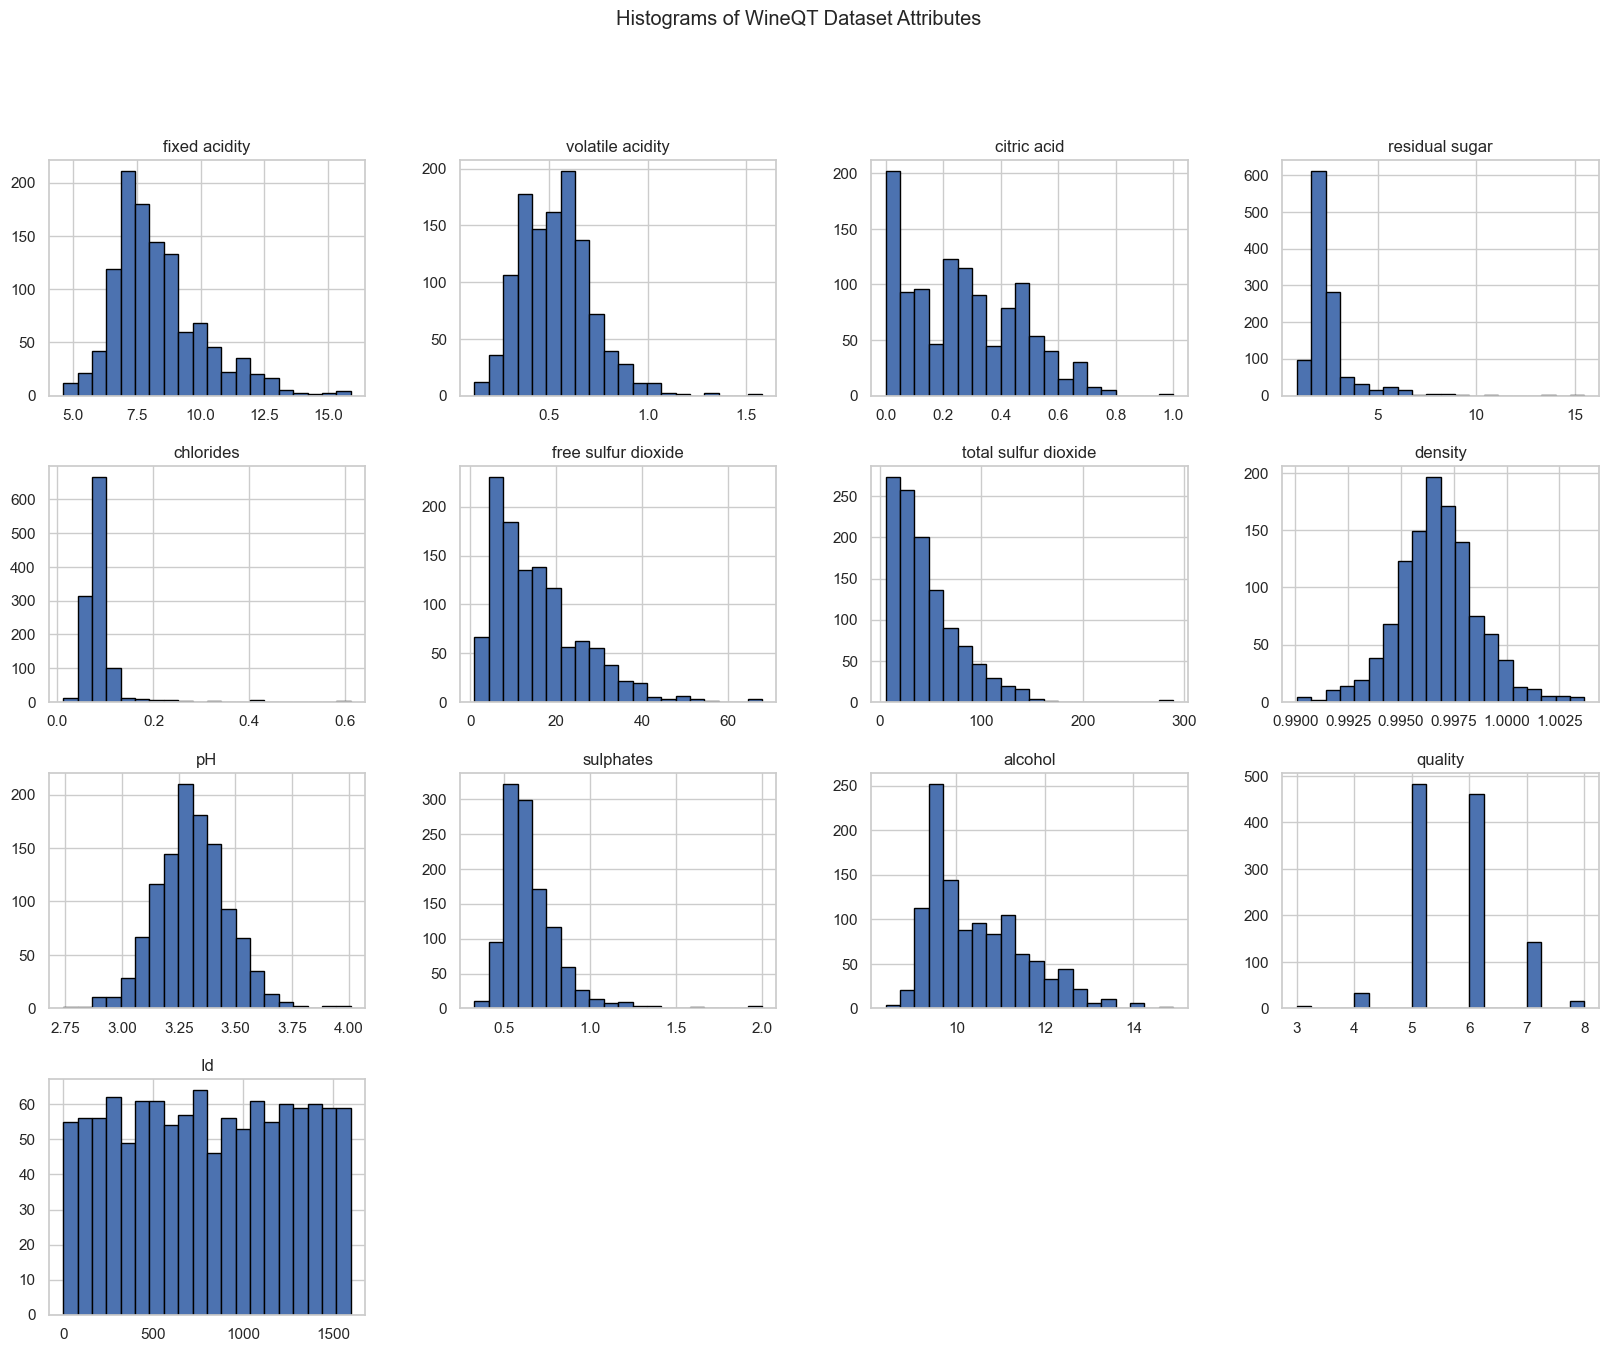

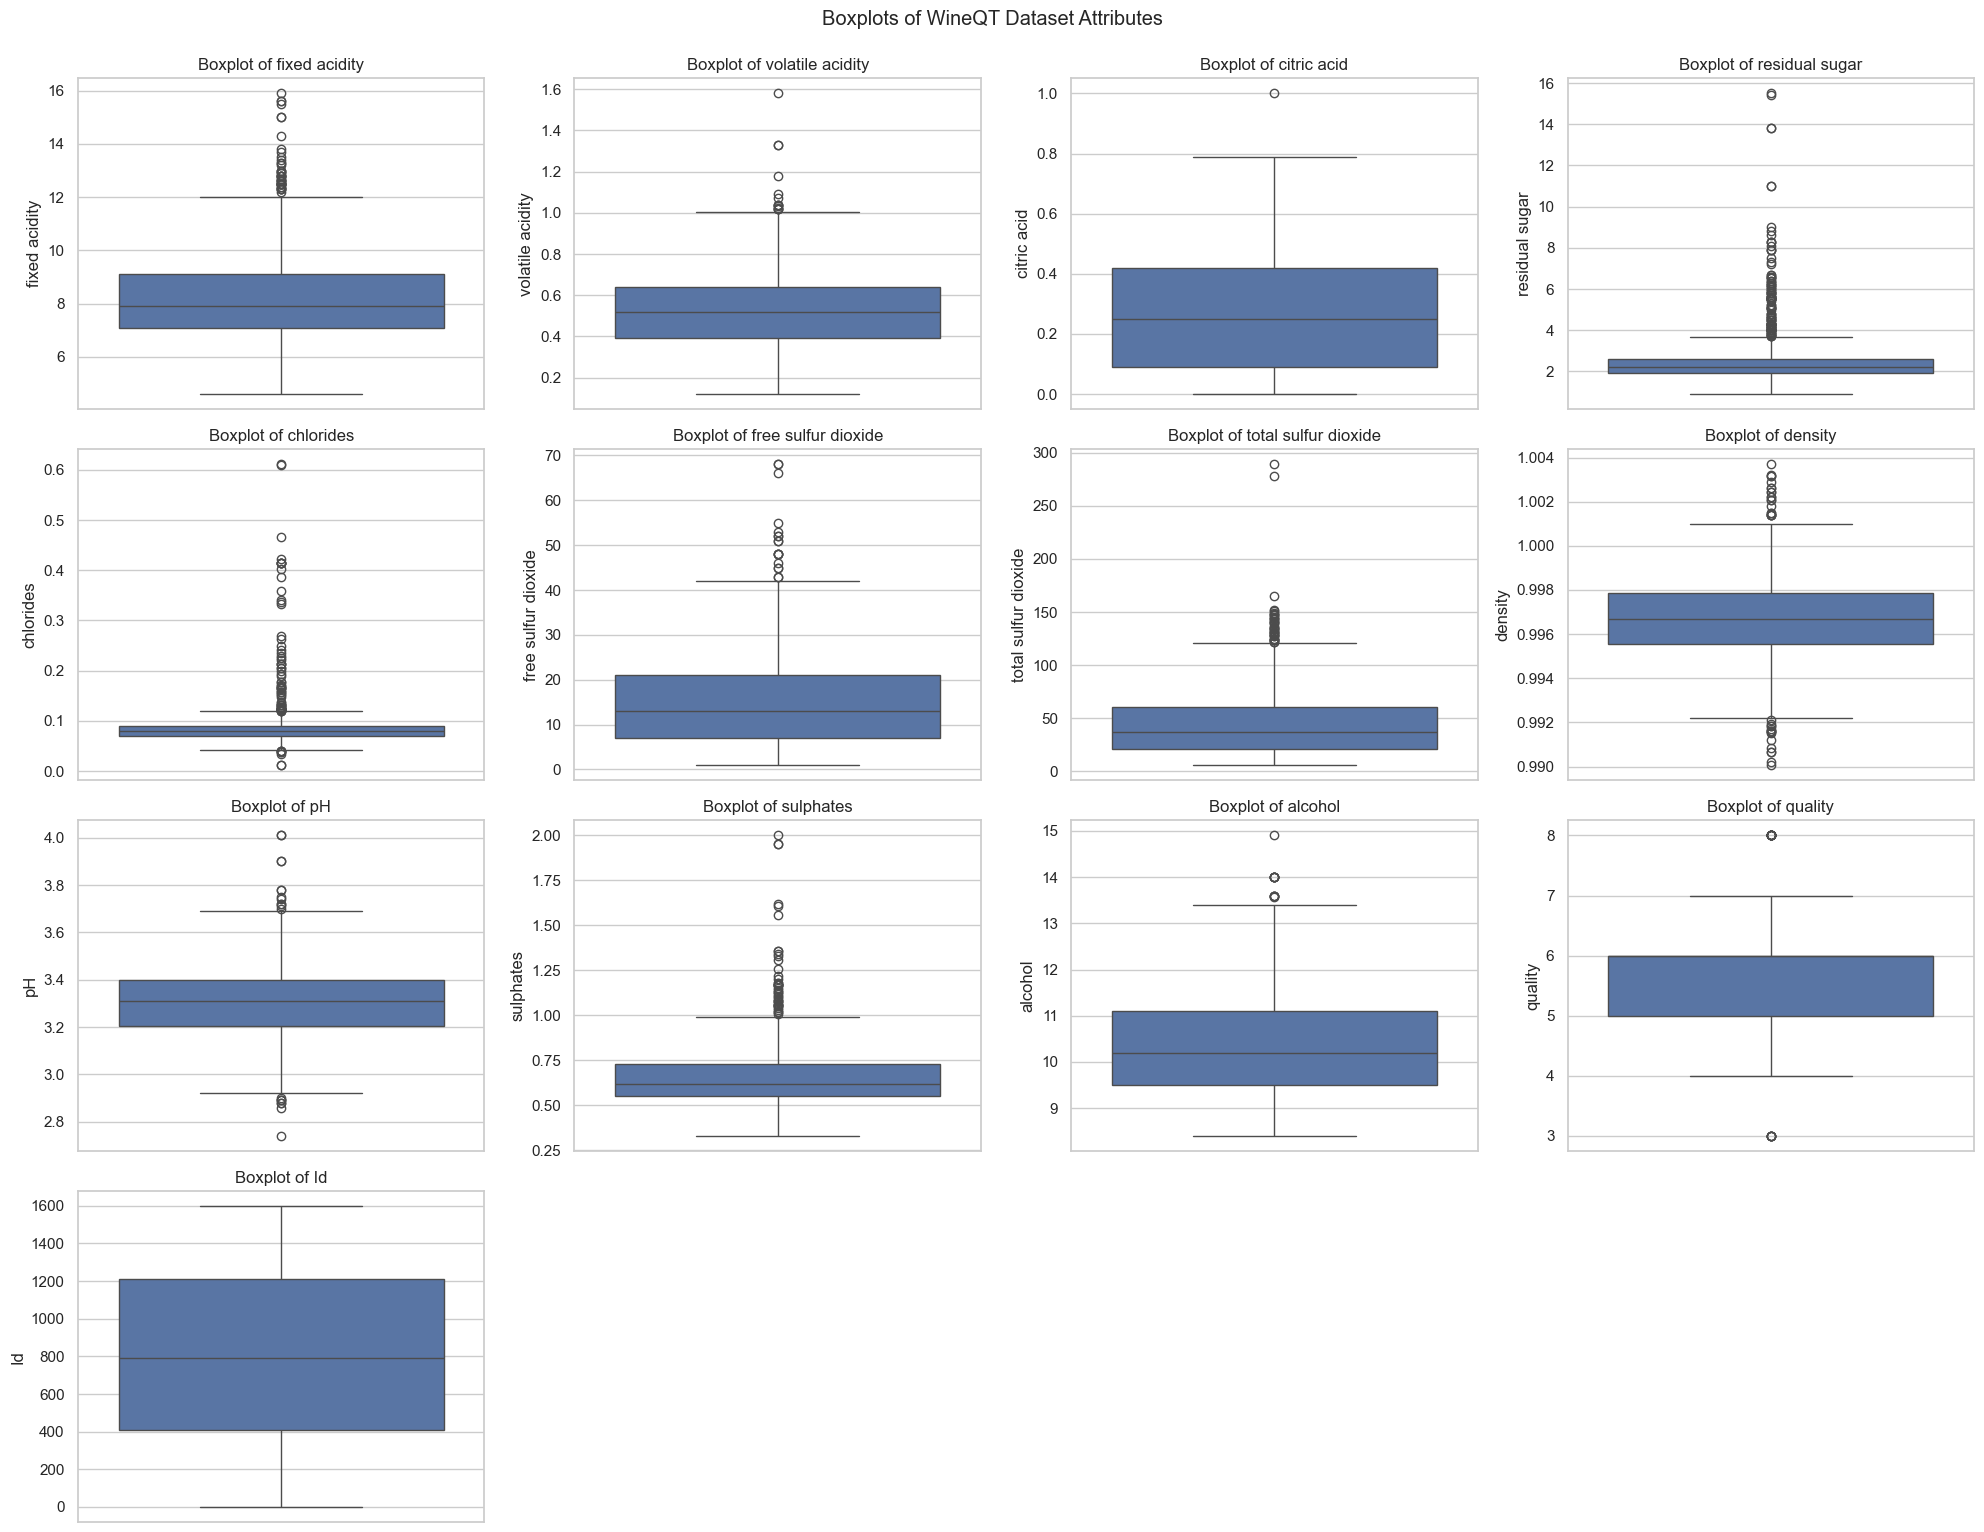

In [31]:
url = "https://raw.githubusercontent.com/jzhan609/CSI4106-Projects/main/datasets/WineQT.csv"
df = pd.read_csv(url)
df.drop(columns=['Id'], inplace=True)

sns.set(style="whitegrid")

# Create histograms for each attribute
df.hist(bins=20, figsize=(20, 15), edgecolor='black')
plt.suptitle('Histograms of WineQT Dataset Attributes')
plt.show()

# Create boxplots for each attribute
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.suptitle('Boxplots of WineQT Dataset Attributes', y=1.02)
plt.show()

## Result
From the histograms we can see that all variables follow a relatively normal distribution with varying levels of skewness. The most gaussian variables are density and pH, while the least gaussian variables are citric acid and the sulfur dioxide variables.

From the boxplots, we can see that most of the variables have a large number of outliers. This could be due to the high skew of the data as seen from the histograms. We can see that quality, alcohol and citric acid have the least number of outliers.

4. **Class Distribution Analysis**: Investigate the distribution of class labels within the dataset. Employ bar plots to visualize the frequency of instances for each class, and assess whether the dataset is balanced or imbalanced.

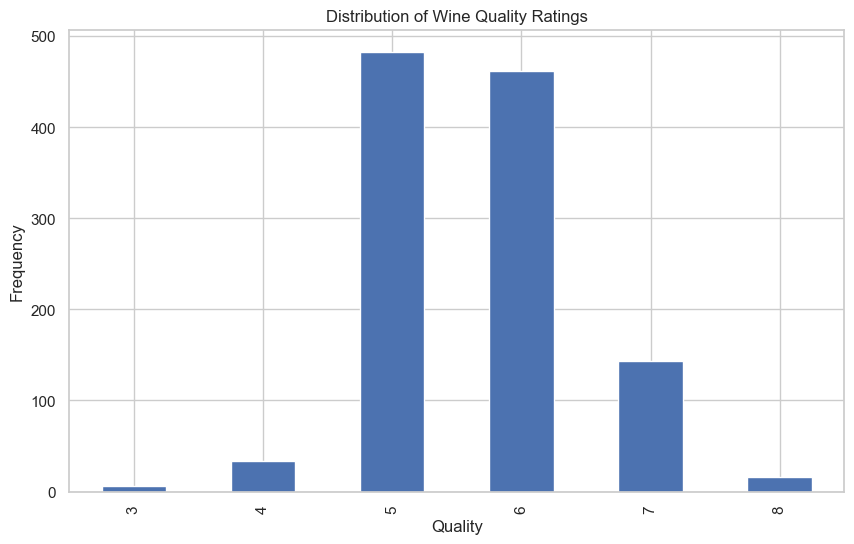

In [38]:
class_counts = df['quality'].value_counts().sort_index()

# Step 3: Visualize the distribution
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Wine Quality Ratings')
plt.show()

## Result
As there is only one categorical variable for the WineQT dataset, that is what we will be studying class labels for. From the bar graph of the quantity, we can see that the values for each of the qualities varies drastically. Thus we can conclude that the dataset is imbalanced.

5. **Preprocessing**: 

    5.1 For numerical features, determine the best transformation to use. Indicate the transformation that seems appropriate and why. Include the code illustrating how to apply the transformation. For at least one attribute, show the distribution before and after the transformation. See [Preprocessing data](https://scikit-learn.org/able/modules/preprocessing.html).

    5.2 For categorical features, show how to apply [one-hot encoding](https://ikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). If your dataset does not have categorical data, show how to apply the one-hot encoder to the label (target variable).

In [ ]:
# Your code goes here

6. **Training and target data**: Set the Python variable `X` to designate the data and `y` to designate the target class. Make sure to select only the informative features.

In [ ]:
# Your code goes here

7. **Training and test sets**: Split the dataset into training and testing sets. Reserve 20% of data for testing.

In [ ]:
# Your code goes here

--------------------------------------------------------------------------

# References

Make sure you provide references to ALL sources used (articles, code, algorithms).

## AI transcript
**Hint:** To share a link to your colab notebook, click on "share" on the top right. Then, under *General access* , change *Restricted* to "Anyone with the link".